In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## Data Cleaning

In [2]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
          'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
          'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
          'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
          'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
          'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
          'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
          'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']

### Importing remote work datasets and cleaning it

In [3]:
data_2018 = pd.read_csv('new-state-data/2018-remote-state-data.csv')

filtered_data_2018 = data_2018[data_2018['Unnamed: 0'] == 'Worked at home:']

worked_at_home_2018 = filtered_data_2018.iloc[0, 1::2].values

final_data_2018 = pd.DataFrame({
    'State': states,
    'Worked from home': worked_at_home_2018
})

final_data_2018['Worked from home'] = final_data_2018['Worked from home'].str.replace(',', '').astype(int)

final_data_2018 = final_data_2018[final_data_2018['State'] != 'Puerto Rico']

final_data_2018.head()

,State,Worked from home
0,Alabama,68856
1,Alaska,17696
2,Arizona,212657
3,Arkansas,47991
4,California,1099288


In [4]:
data_2019 = pd.read_csv('new-state-data/2019-remote-state-data.csv')

filtered_data_2019 = data_2019[data_2019['Unnamed: 0'] == 'Worked from home:']

worked_at_home_2019 = filtered_data_2019.iloc[0, 1::2].values

final_data_2019 = pd.DataFrame({
    'State': states,
    'Worked from home': worked_at_home_2019
})

final_data_2019['Worked from home'] = final_data_2019['Worked from home'].str.replace(',', '').astype(int)

final_data_2019 = final_data_2019[final_data_2019['State'] != 'Puerto Rico']

final_data_2019.head()

,State,Worked from home
0,Alabama,71617
1,Alaska,14782
2,Arizona,246651
3,Arkansas,45324
4,California,1179695


In [5]:
data_2020 = pd.read_csv('new-state-data/2020-remote-state-data.csv')

filtered_data_2020 = data_2020[data_2020['Unnamed: 0'] == 'Worked from home:']

state_values_2020 = filtered_data_2020.iloc[0, ::2].values

worked_at_home_2020 = filtered_data_2020.iloc[0, 1::2].values

final_data_2020 = pd.DataFrame({
    'State': states,
    'Worked from home': list(worked_at_home_2020) + [None]
})

final_data_2020 = final_data_2020[final_data_2020['State'] != 'Puerto Rico']

final_data_2020['Worked from home'] = final_data_2020['Worked from home'].str.replace(',', '').astype(int)

final_data_2020.head()

,State,Worked from home
0,Alabama,178577
1,Alaska,39186
2,Arizona,581707
3,Arkansas,100165
4,California,3332699


In [6]:
data_2021 = pd.read_csv('new-state-data/2021-remote-state-data.csv')

filtered_data_2021 = data_2021[data_2021['Unnamed: 0'] == 'Worked from home:']

worked_at_home_2021 = filtered_data_2021.iloc[0, 1::2].values

final_data_2021 = pd.DataFrame({
    'State': states,
    'Worked from home': worked_at_home_2021
})

final_data_2021['Worked from home'] = final_data_2021['Worked from home'].str.replace(',', '').astype(int)

final_data_2021 = final_data_2021[final_data_2021['State'] != 'Puerto Rico']

final_data_2021.head()

,State,Worked from home
0,Alabama,206820
1,Alaska,35235
2,Arizona,675552
3,Arkansas,126793
4,California,3789909


In [7]:
data_2022 = pd.read_csv('new-state-data/2022-remote-state-data.csv')

filtered_data_2022 = data_2022[data_2022['Unnamed: 0'] == 'Worked from home:']

worked_at_home_2022 = filtered_data_2022.iloc[0, 1::2].values

# Create a DataFrame with states and worked_at_home_values for 2019
final_data_2022 = pd.DataFrame({
    'State': states,
    'Worked from home': worked_at_home_2022
})

# Convert the "Worked at home" column to integers
final_data_2022['Worked from home'] = final_data_2022['Worked from home'].str.replace(',', '').astype(int)

final_data_2022 = final_data_2022[final_data_2022['State'] != 'Puerto Rico']

# Display the final cleaned data for 2019
final_data_2022.head()

,State,Worked from home
0,Alabama,199321
1,Alaska,33843
2,Arizona,647427
3,Arkansas,115063
4,California,3182255


### Merging it all into one data set

In [8]:
combined_wfh_data = pd.concat([
    final_data_2018.assign(Year=2018),
    final_data_2019.assign(Year=2019),
    final_data_2020.assign(Year=2020),
    final_data_2021.assign(Year=2021), 
    final_data_2022.assign(Year=2022)
])

combined_wfh_data = combined_wfh_data[['State', 'Year', 'Worked from home']]

combined_wfh_data = combined_wfh_data.sort_values(by=["State", "Year"])

combined_wfh_data.reset_index(drop=True, inplace=True)

combined_wfh_data

,State,Year,Worked from home
0,Alabama,2018,68856
1,Alabama,2019,71617
2,Alabama,2020,178577
3,Alabama,2021,206820
4,Alabama,2022,199321
...,...,...,...
250,Wyoming,2018,17513
251,Wyoming,2019,15941
252,Wyoming,2020,24515
253,Wyoming,2021,25177


### Importing $\mathrm{CO_2}$ Consumption dataset and cleaning it

In [9]:
pd.read_excel('table1.xlsx')

data = pd.read_excel('table1.xlsx', skiprows=3)

# Rename the columns properly
data.columns = data.iloc[0]
data = data.drop(0)

# Extract the relevant columns for the years 2018 to 2021
columns_needed = ['State', 2018, 2019, 2020, 2021]

filtered_data = data[columns_needed]

# Reset the index for better readability
filtered_data.reset_index(drop=True, inplace=True)

filtered_data = filtered_data.melt(id_vars=["State"], var_name="Year", value_name="Emissions")

rows_to_drop = filtered_data[filtered_data['State'].str.contains('Sources:', na=False)].index

filtered_data = filtered_data.drop(rows_to_drop)

filtered_data.reset_index(drop=True, inplace=True)

rows_to_drop_total = filtered_data[filtered_data['State'].str.contains('Total of states', na=False)].index

filtered_data = filtered_data.drop(rows_to_drop_total)

# Reset index after dropping the rows
filtered_data.reset_index(drop=True, inplace=True)

filtered_data = filtered_data.sort_values(by=["State", "Year"])

filtered_data.reset_index(drop=True, inplace=True)

co2_data_clean = filtered_data.dropna()

# Reset index for better readability
co2_data_clean.reset_index(drop=True, inplace=True)

co2_data_clean['Year'] = co2_data_clean['Year'].astype(int)

co2_data_clean

/var/folders/nt/trr1v_vd75qb1zyf0b0xzkzc0000gn/T/ipykernel_20328/3585301417.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_data_clean['Year'] = co2_data_clean['Year'].astype(int)


,State,Year,Emissions
0,Alabama,2018,112.355761
1,Alabama,2019,106.254617
2,Alabama,2020,98.431803
3,Alabama,2021,108.392103
4,Alaska,2018,34.515445
...,...,...,...
199,Wisconsin,2021,92.461744
200,Wyoming,2018,63.846521
201,Wyoming,2019,59.097402
202,Wyoming,2020,55.626761


### Merging it all into one dataset

In [10]:
merged_data = pd.merge(co2_data_clean, combined_wfh_data, on=['State', 'Year'])
merged_data

,State,Year,Emissions,Worked from home
0,Alabama,2018,112.355761,68856
1,Alabama,2019,106.254617,71617
2,Alabama,2020,98.431803,178577
3,Alabama,2021,108.392103,206820
4,Alaska,2018,34.515445,17696
...,...,...,...,...
199,Wisconsin,2021,92.461744,434916
200,Wyoming,2018,63.846521,17513
201,Wyoming,2019,59.097402,15941
202,Wyoming,2020,55.626761,24515


<br><br><br><br><br>

## Exploratory Data Analysis (EDA)

- plots trends across the data

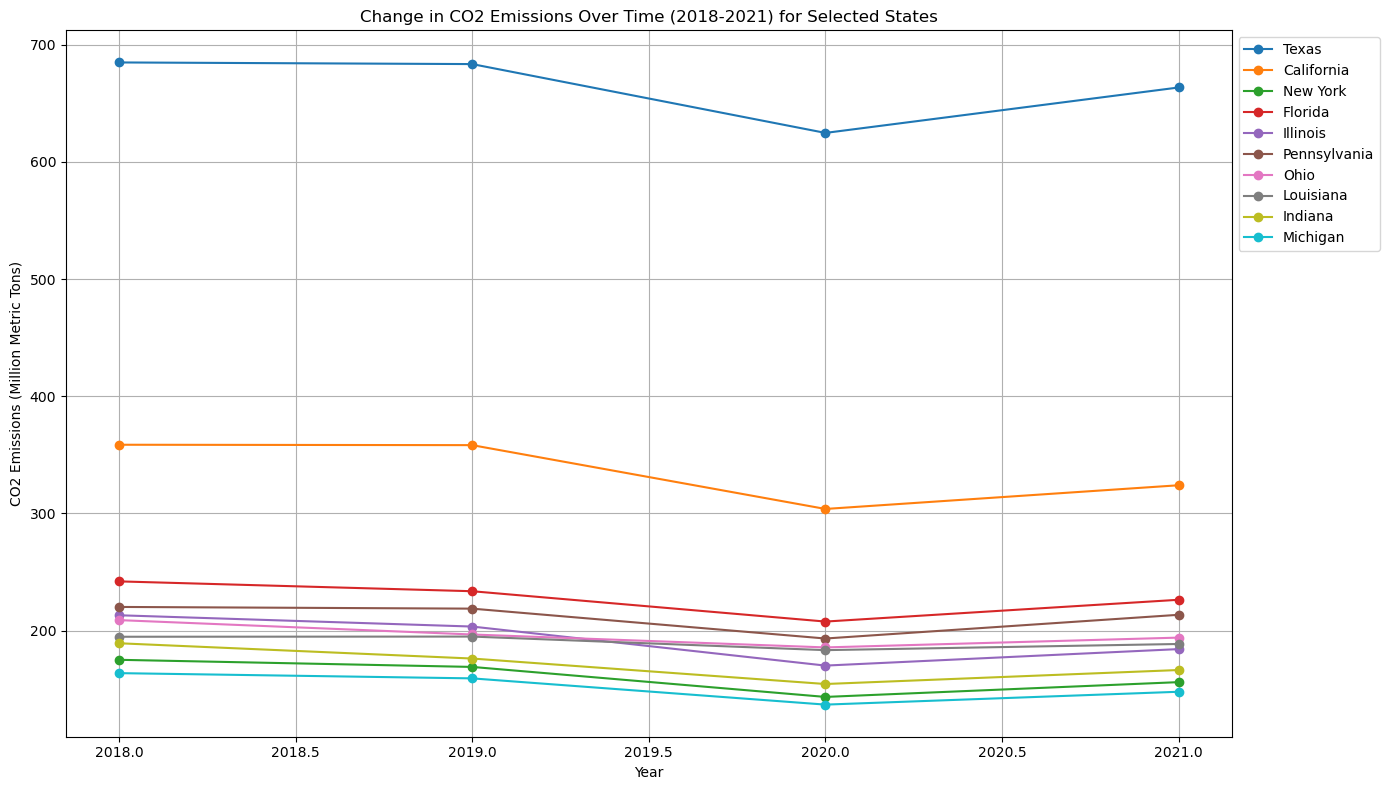

In [11]:
plt.figure(figsize=(14, 8))

selected_states = ['Texas', 'California', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Louisiana', 'Indiana', 'Michigan']

for state in selected_states:
    state_data = co2_data_clean[co2_data_clean['State'] == state]
    plt.plot(state_data['Year'], state_data['Emissions'], marker='o', label=state)

plt.title('Change in CO2 Emissions Over Time (2018-2021) for Selected States')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Metric Tons)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

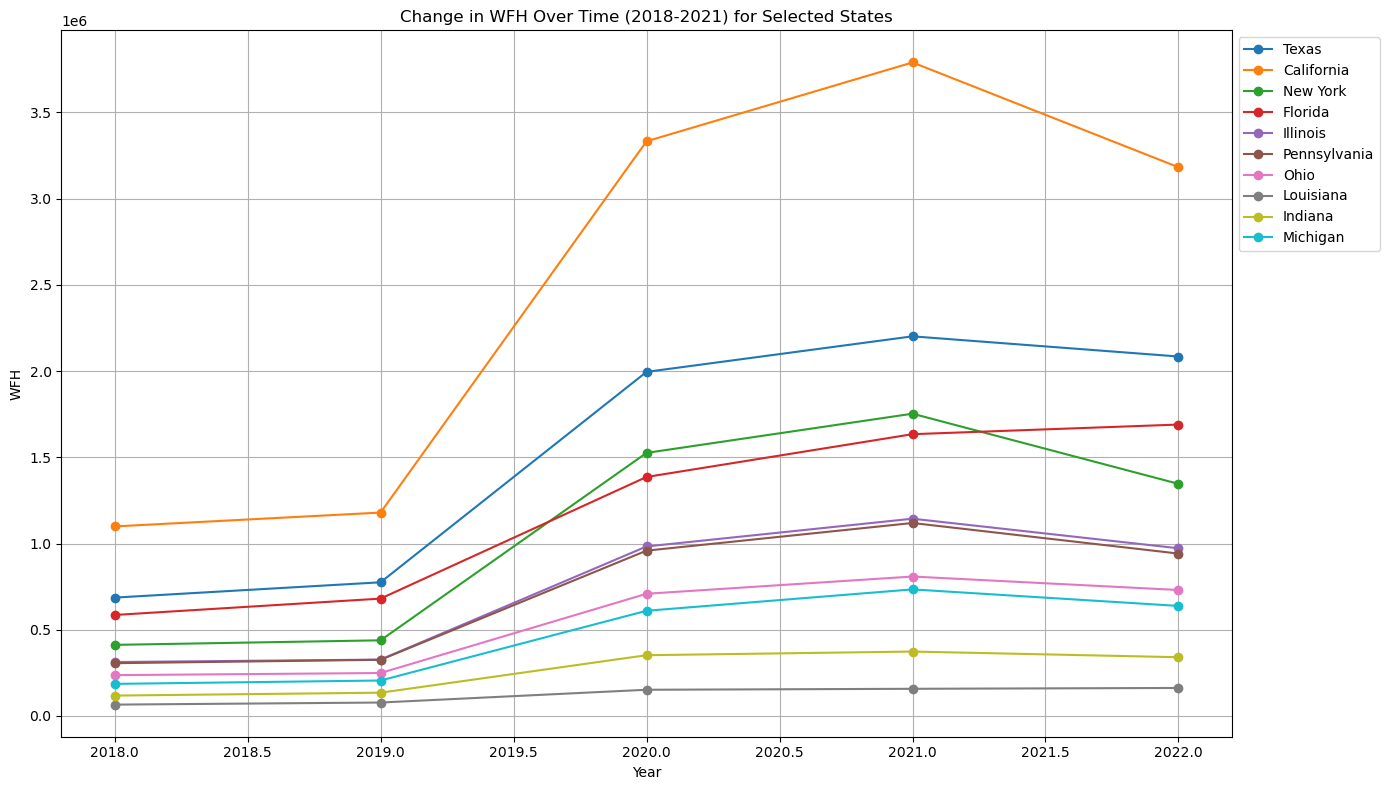

In [12]:
plt.figure(figsize=(14, 8))
selected_states = ['Texas', 'California', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Louisiana', 'Indiana', 'Michigan']

for state in selected_states:
    state_data = combined_wfh_data[combined_wfh_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Worked from home'], marker='o', label=state)

plt.title('Change in WFH Over Time (2018-2021) for Selected States')
plt.xlabel('Year')
plt.ylabel('WFH')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

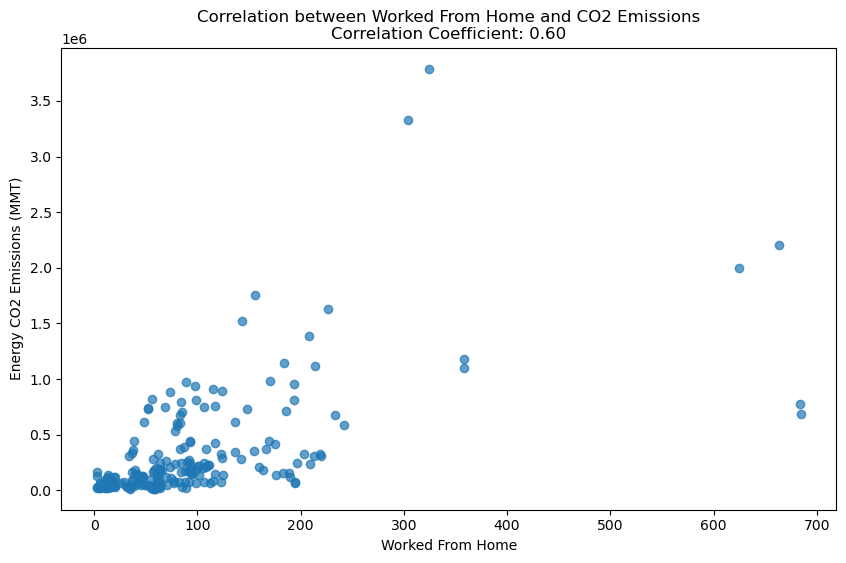

0.5996902897234389

In [13]:
merged_data = pd.merge(co2_data_clean, combined_wfh_data, on=['State', 'Year'])

correlation = merged_data['Emissions'].corr(merged_data['Worked from home'])

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Emissions'], merged_data['Worked from home'], alpha=0.7)
plt.title(f'Correlation between Worked From Home and CO2 Emissions\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Worked From Home')
plt.ylabel('Energy CO2 Emissions (MMT)')
plt.show()

correlation

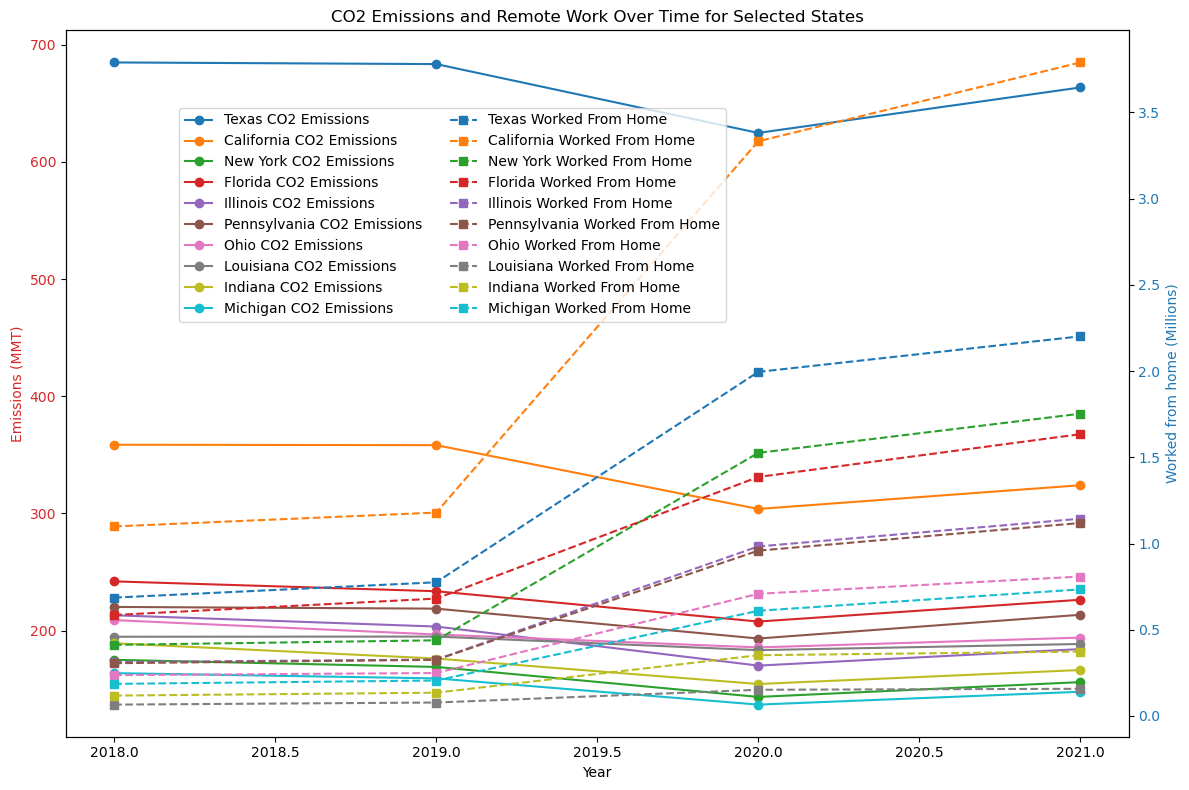

In [14]:
selected_states = ['Texas', 'California', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Louisiana', 'Indiana', 'Michigan']

fig, ax1 = plt.subplots(figsize=(12, 8))

colors = plt.cm.tab10(np.linspace(0, 1, len(selected_states)))

ax1.set_xlabel('Year')
ax1.set_ylabel('Emissions (MMT)', color='tab:red')
for i, state in enumerate(selected_states):
    state_data = merged_data[merged_data['State'] == state]
    ax1.plot(state_data['Year'], state_data['Emissions'], color=colors[i], marker='o', linestyle='-', label=f'{state} CO2 Emissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Worked from home (Millions)', color='tab:blue')
for i, state in enumerate(selected_states):
    state_data = merged_data[merged_data['State'] == state]
    ax2.plot(state_data['Year'], state_data['Worked from home'] / 1e6, color=colors[i], marker='s', linestyle='--', label=f'{state} Worked From Home')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('CO2 Emissions and Remote Work Over Time for Selected States')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.1, 0.9), ncol=2)

fig.tight_layout()
plt.show()


<br><br><br><br><br>

# Hypothesis Testing

Question: Was the average CO2 consumption in the year 2020 significantly lower than the average CO2 consumption in previous years?

Null Hypothesis:

$H_0$: The mean CO2 consumption in 2020 is equal to or greater than the mean $\mathrm{CO_2}$ consumption in other years.

Alternative Hypothesis:

$H_1$: The mean $\mathrm{CO_2}$ consumption in 2020 is lower than the mean $\mathrm{CO_2}$ consumption in other years.




 ### Preprocessing data

In [15]:
df = pd.read_excel('table1.xlsx').T.reset_index()

df = df.loc[::,3:]
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header
df.columns.values[0] = "Year"
df.set_index('Year')
total_year = df.iloc[:,-3]
df = df.iloc[:-4,:]
df = df.iloc[:,:-3]
df['Year'] = df['Year'].apply(lambda x: int(x))
past_2000 = df.iloc[30:,:]
past_2000.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
31,2000,142.298577,43.579298,86.640039,63.340678,382.286455,85.51638,42.750767,16.679414,4.313088,...,14.23058,128.727078,673.038576,65.401313,6.784422,123.30906,84.338744,115.71061,107.794425,63.471657
32,2001,133.32195,42.552855,88.861709,62.497584,385.559363,93.301223,41.566124,15.996317,4.08285,...,13.503998,127.217065,666.89956,63.190861,6.62389,120.831993,79.632992,105.671606,105.902637,63.721907
33,2002,138.297153,42.735737,88.267226,61.203474,384.423636,91.603485,40.042637,15.881979,4.186078,...,13.770629,126.363851,678.25234,62.56187,6.360928,119.336078,73.334958,118.665261,107.147215,62.492638
34,2003,139.792469,42.895487,90.493643,62.190188,374.634361,91.00248,42.964297,16.609497,3.953337,...,13.769611,125.144951,671.21972,63.550164,6.665863,124.114728,75.748368,115.407497,105.60108,64.488423
35,2004,141.979013,46.202564,97.2877,62.510728,392.687719,93.545791,44.716783,16.618529,4.021222,...,13.793878,127.160971,670.653018,65.955877,7.073433,127.729766,77.64994,112.673818,107.757727,64.415747


In [16]:
df_long = pd.melt(past_2000, id_vars=['Year'], var_name='State', value_name='CO2_Consumption')
df_long

,Year,State,CO2_Consumption
0,2000,Alabama,142.298577
1,2001,Alabama,133.32195
2,2002,Alabama,138.297153
3,2003,Alabama,139.792469
4,2004,Alabama,141.979013
...,...,...,...
1117,2017,Wyoming,62.796996
1118,2018,Wyoming,63.846521
1119,2019,Wyoming,59.097402
1120,2020,Wyoming,55.626761


In [17]:
df_long['Year_2020'] = (df_long['Year'] == 2020).astype(int)
df_long

,Year,State,CO2_Consumption,Year_2020
0,2000,Alabama,142.298577,0
1,2001,Alabama,133.32195,0
2,2002,Alabama,138.297153,0
3,2003,Alabama,139.792469,0
4,2004,Alabama,141.979013,0
...,...,...,...,...
1117,2017,Wyoming,62.796996,0
1118,2018,Wyoming,63.846521,0
1119,2019,Wyoming,59.097402,0
1120,2020,Wyoming,55.626761,1


In [18]:
df = df_long.drop('State', axis=1)
df['Year'] = df['Year'].astype(float)
df['CO2_Consumption'] = df['CO2_Consumption'].astype(float)
df['Year_2020'] = df['Year_2020'].astype(int)

In [19]:
data_2020 = df_long[df_long['Year'] == 2020]['CO2_Consumption'].values
data_other_years = df_long[df_long['Year'] != 2020]['CO2_Consumption'].values


### Assumptions 

#### Visualization of distribution through KDE plots

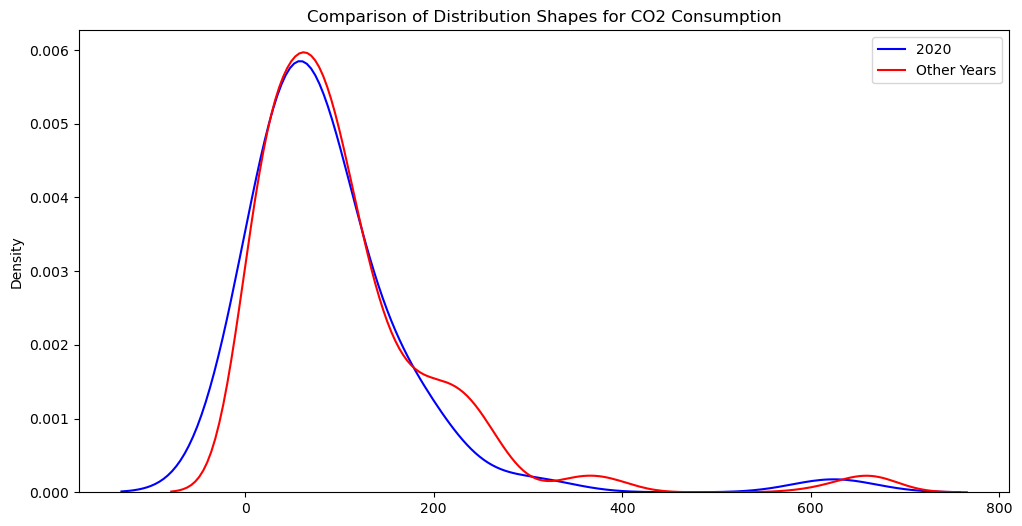

In [20]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data_2020, color="blue", label="2020")
sns.kdeplot(data_other_years, color="red", label="Other Years")
plt.title('Comparison of Distribution Shapes for CO2 Consumption')
plt.legend()
plt.show()

#### Kolmogorov-Smirnov test for comparing distribution shapes
 - Checking if the data is normal

In [21]:
ks_stat, ks_pvalue = ks_2samp(data_2020, data_other_years)
print("KS Statistic:", ks_stat, "P-Value:", ks_pvalue)

KS Statistic: 0.1568627450980392 P-Value: 0.16530670849969212


#### Mann-Whitney U Test

In [22]:
u_statistic, p_value = mannwhitneyu(list(data_2020), list(data_other_years), alternative='less')
p_value

0.062308480486254474

<br><br><br><br>

## Logistical Regression

 #### Preprocessing Data

In [23]:
merged_data

,State,Year,Emissions,Worked from home
0,Alabama,2018,112.355761,68856
1,Alabama,2019,106.254617,71617
2,Alabama,2020,98.431803,178577
3,Alabama,2021,108.392103,206820
4,Alaska,2018,34.515445,17696
...,...,...,...,...
199,Wisconsin,2021,92.461744,434916
200,Wyoming,2018,63.846521,17513
201,Wyoming,2019,59.097402,15941
202,Wyoming,2020,55.626761,24515


In [24]:
merged_data['Is_2020']= (merged_data['Year']==2020).astype(int)

In [25]:
X = merged_data[['Emissions', 'Worked from home']]
y = merged_data['Is_2020']

### Model Training 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model = sm.Logit(y_train, X_train_sm)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.545881
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Is_2020   No. Observations:                  163
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            2
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                 0.04333
Time:                        16:48:52   Log-Likelihood:                -88.979
converged:                       True   LL-Null:                       -93.009
Covariance Type:            nonrobust   LLR p-value:                   0.01778
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7814      0.291     -2.690      0.007      -1.351      -0.212
Emissions  

### Model Diagnostics

#### Checking for Linearity

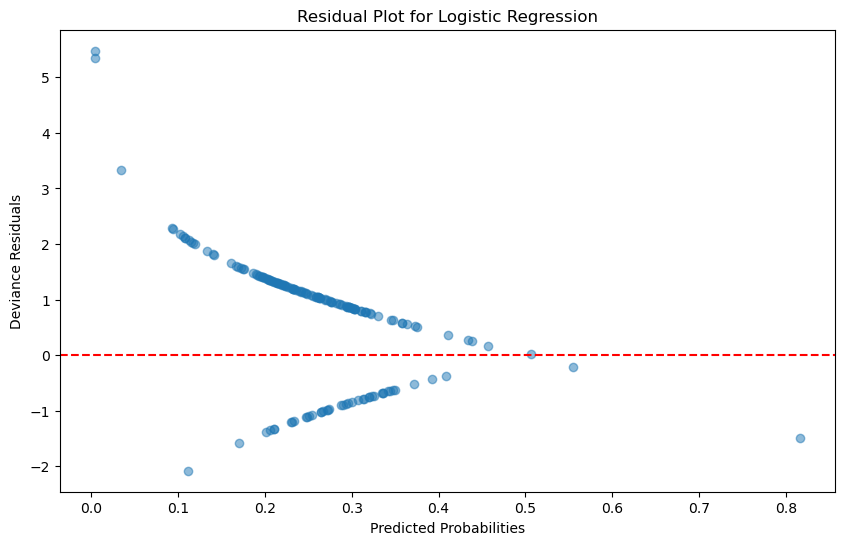

In [27]:
y_pred_prob = result.predict(X_train_sm)
y_pred_class = (y_pred_prob > 0.5).astype(int)
deviance_residuals = np.where(y_train == 1, 
                              np.log(y_pred_prob / (1 - y_pred_prob)),
                              np.log((1 - y_pred_prob) / y_pred_prob))

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_prob, deviance_residuals, alpha=0.5)
plt.title('Residual Plot for Logistic Regression')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Deviance Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()


#### Accuracy

In [28]:
y_pred_probs = result.predict(X_test_sm)
y_pred = (y_pred_probs >= 0.5).astype(int)
correct_predictions = (y_pred == y_test).sum()
total_predictions = len(y_pred)
accuracy = correct_predictions / total_predictions
accuracy

0.8048780487804879

#### ROC Curve

In [29]:
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f'ROC AUC Score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

ROC AUC Score: 0.6736111111111112


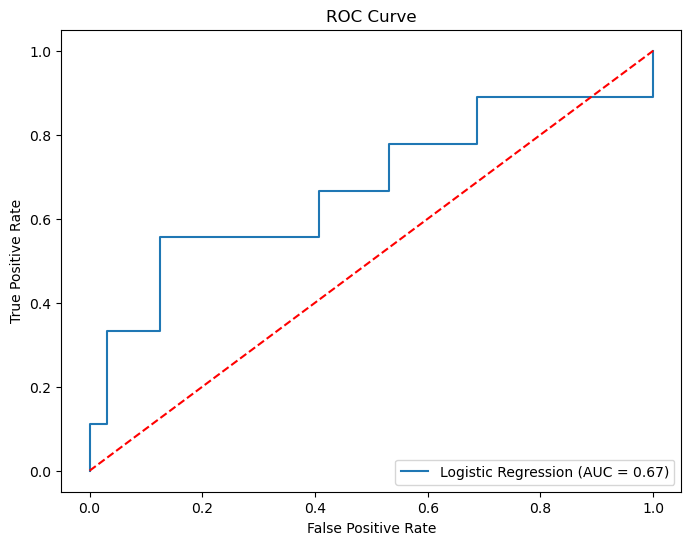

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### Confusion Matrix

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0],
       [ 8,  1]])

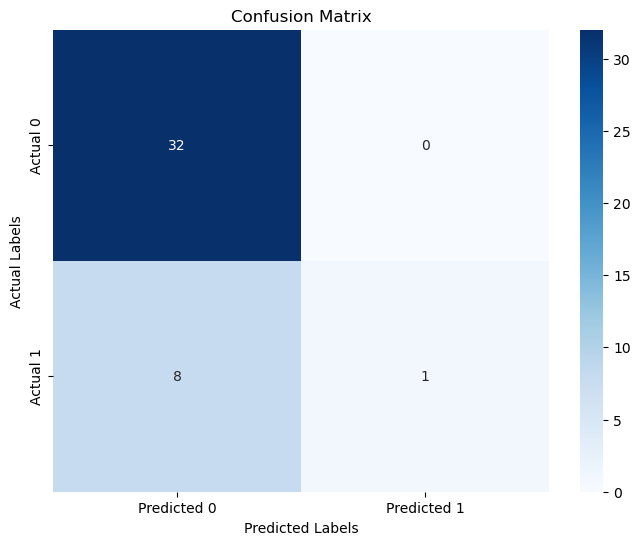

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
